Database Connection (Scraping/Gathering)

In [84]:
import sqlite3

conn = sqlite3.connect('cancer.db')

try:
    conn.cursor()
    print("DB Connected");
except Exception as ex:
    print("DB not Connected");
    

import pandas as pd
data = pd.read_csv (r'clinical_data.csv',index_col=False)   
df = pd.DataFrame(data)

print("DataFrame Shape ->",df.shape,"Rows/Columns");






DB Connected
DataFrame Shape -> (24146, 54) Rows/Columns


Data Validation

Completeness: Refers to the degree to which an entity includes data required to describe a real-world object. In tables in relational database systems, completeness can be measured by the presence of null values, which is usually interpreted as a missing value.

Consistency: The degree to which a set of semantic rules are violated such as a specific data type, an interval for a numerical column, or a set of values for a categorical column.

Accuracy: The correctness of the data and can be measured in two dimensions: syntactic and semantic. Syntactic accuracy compares the representation of a value with a corresponding definition domain, whereas semantic accuracy compares a value with its real-world representation.

Visualizing Missing Data and Validate data to check missing values (Before Cleaning)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24146 entries, 0 to 24145
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0    Study_ID                                          24146 non-null  object 
 1    Study_ID.1                                        24146 non-null  object 
 2   Patient_ID                                         24146 non-null  object 
 3   Sample_ID                                          24146 non-null  object 
 4   Age                                                24146 non-null  float64
 5   Alkylating_Agent_Treatment                         11111 non-null  object 
 6   All_therapy_at_MSKCC                               24146 non-null  object 
 7   Anthracycline_Treatment                            10898 non-null  object 
 8   Antimetobolite_Treatment                           11975 non-null  object 
 9   Cancer

<AxesSubplot: >

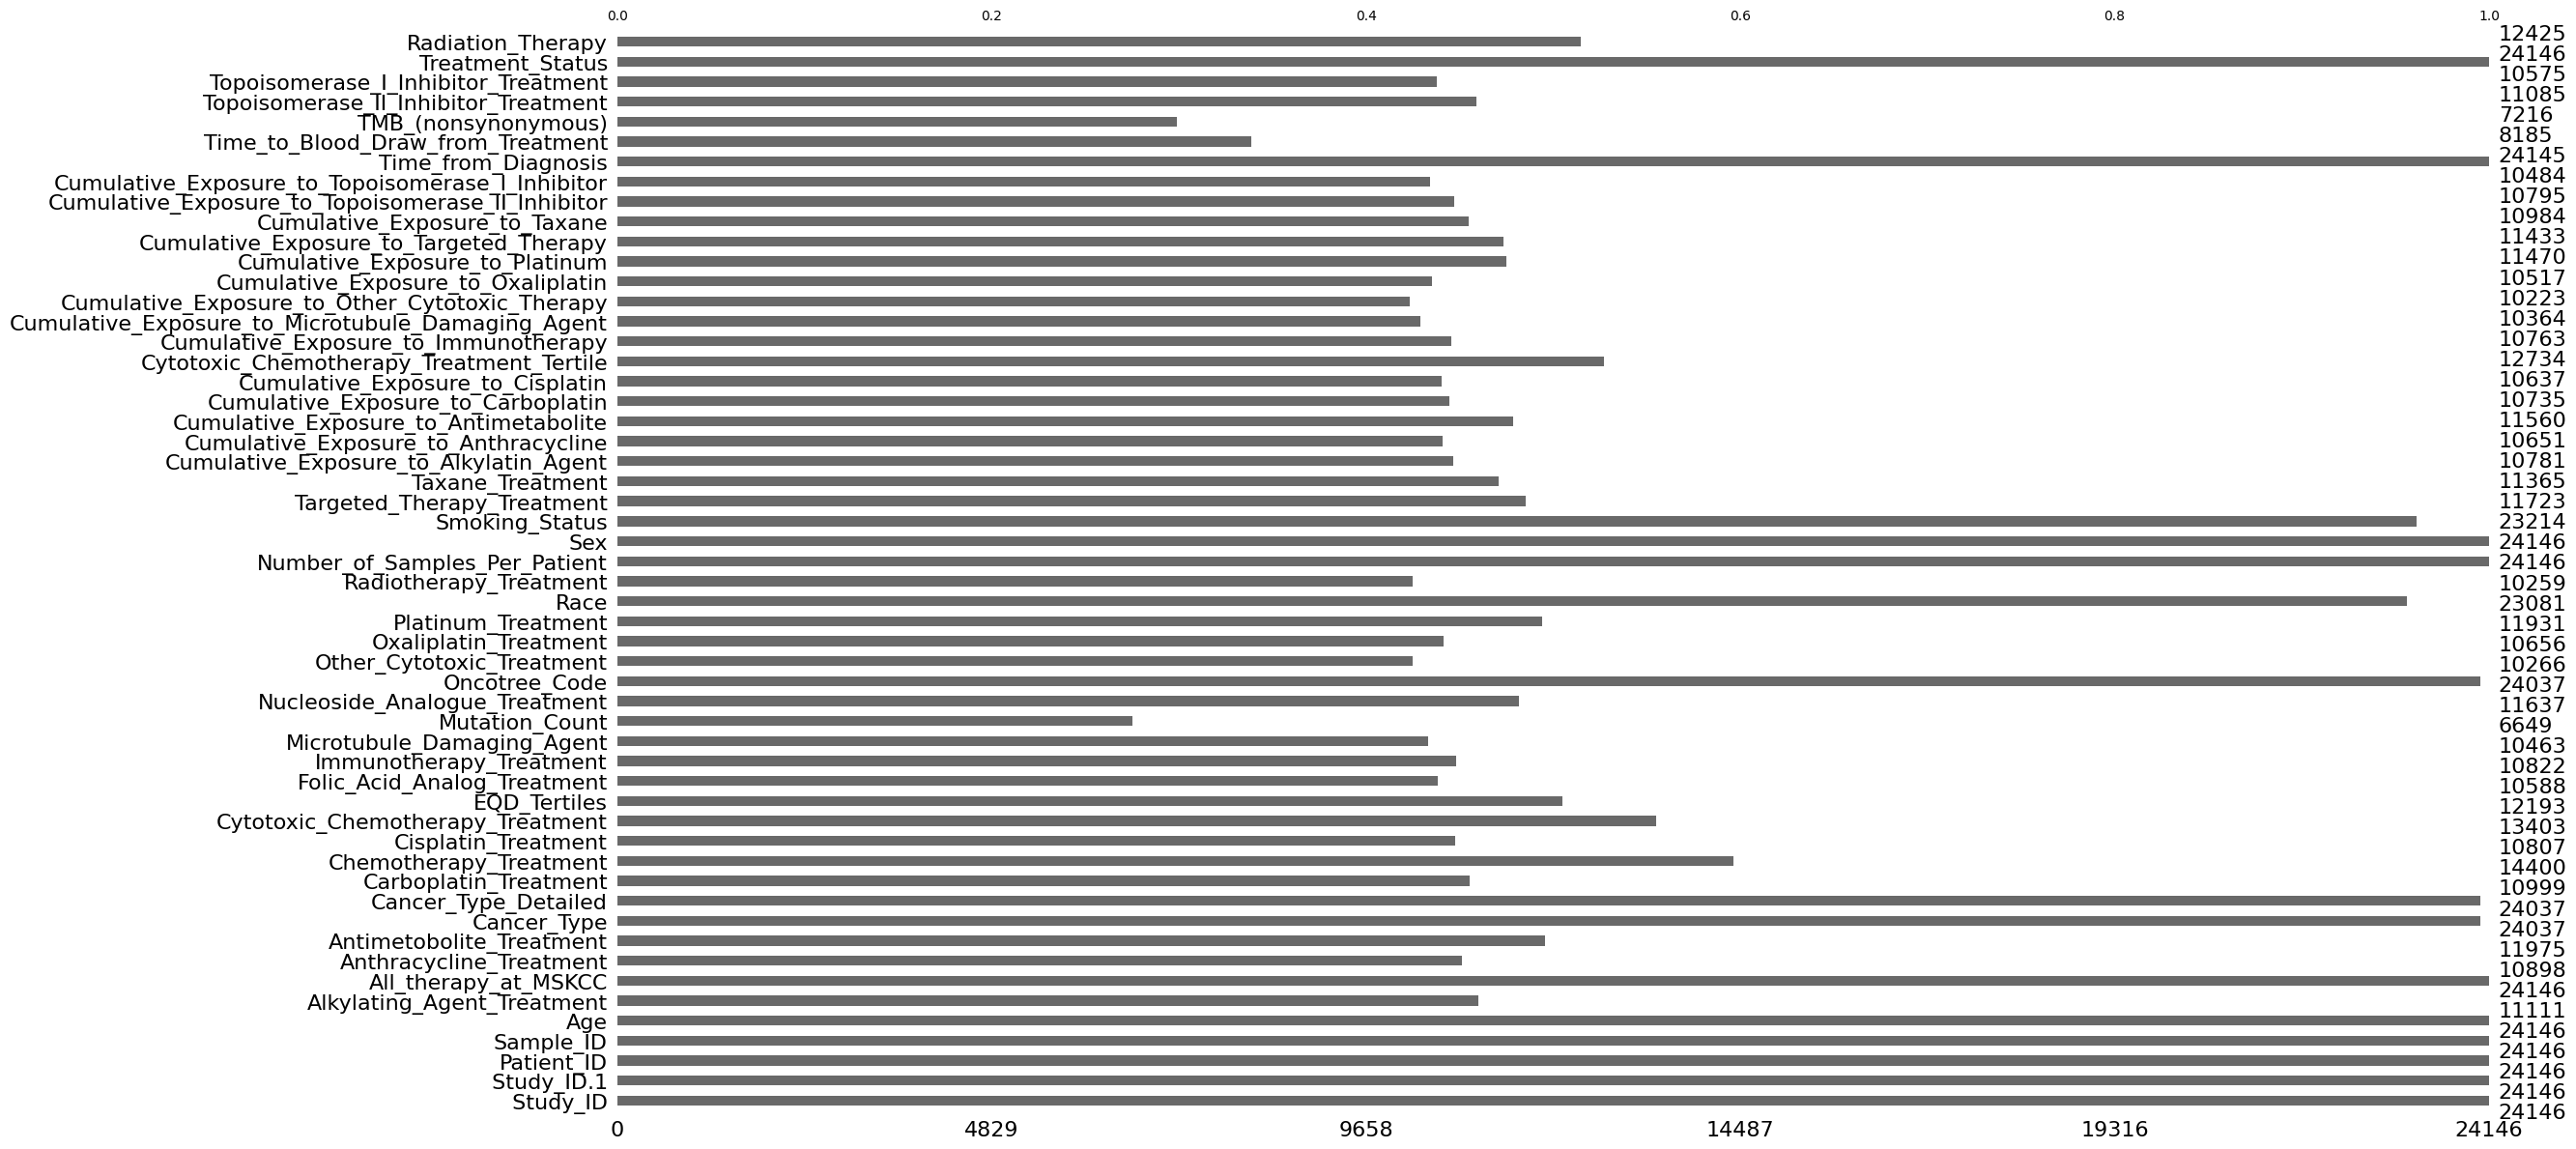

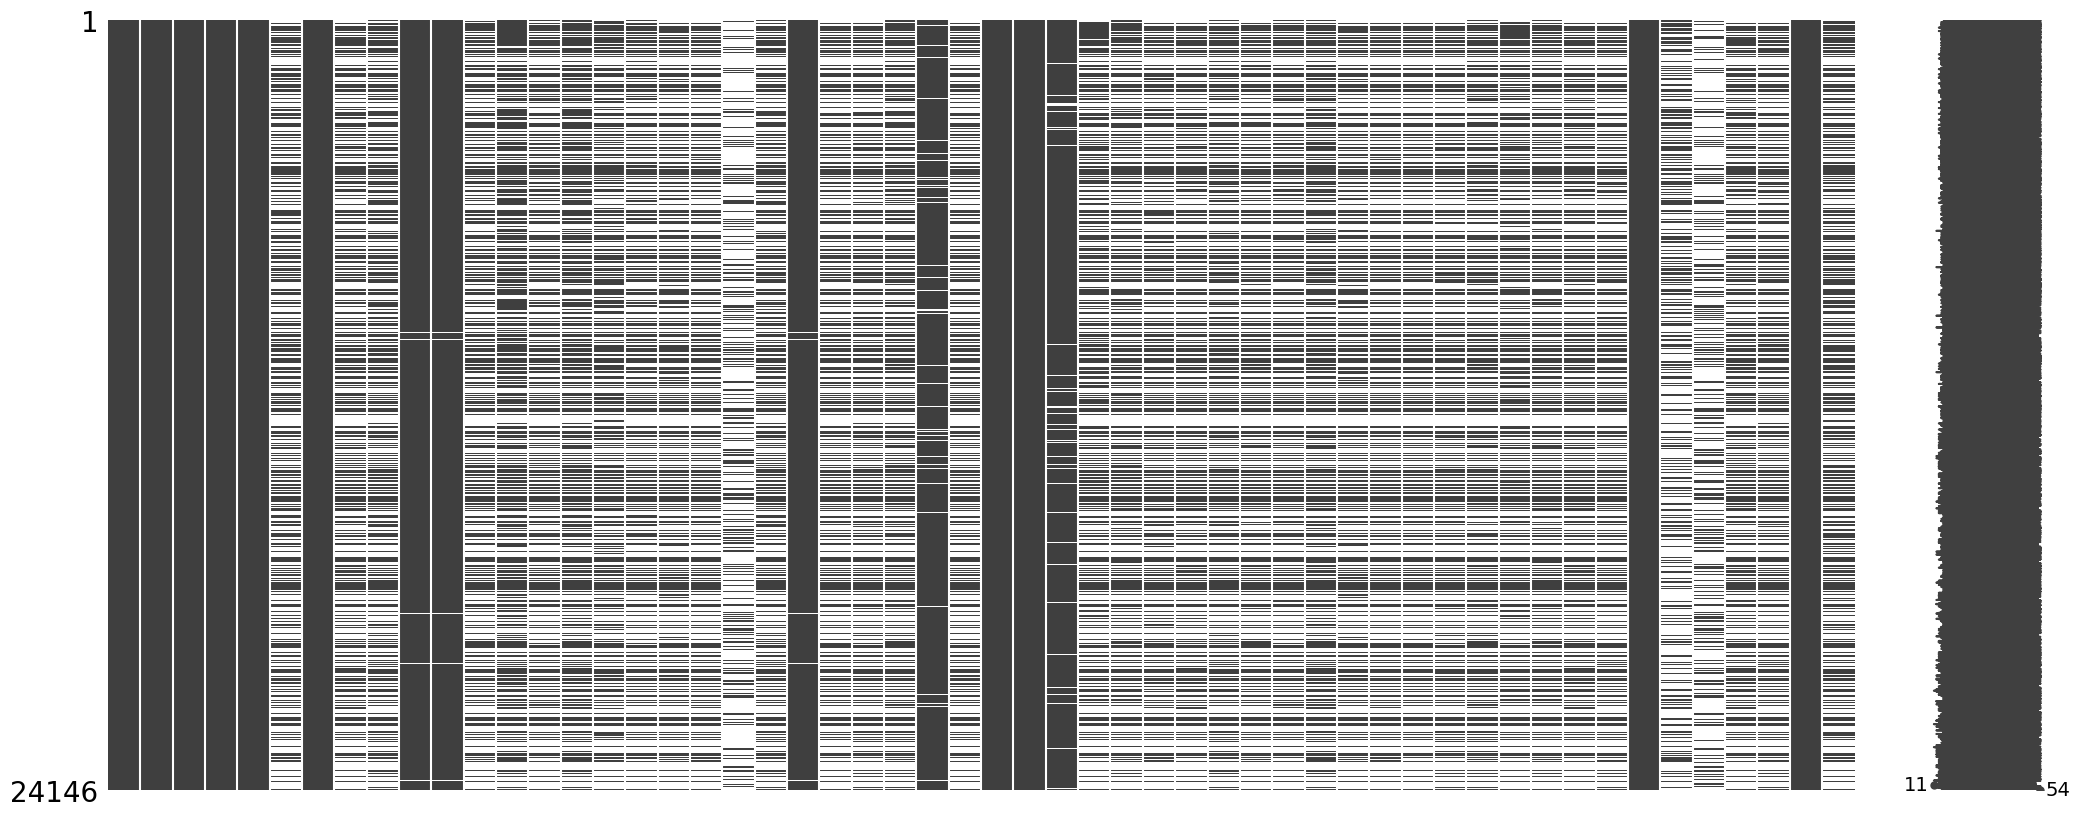

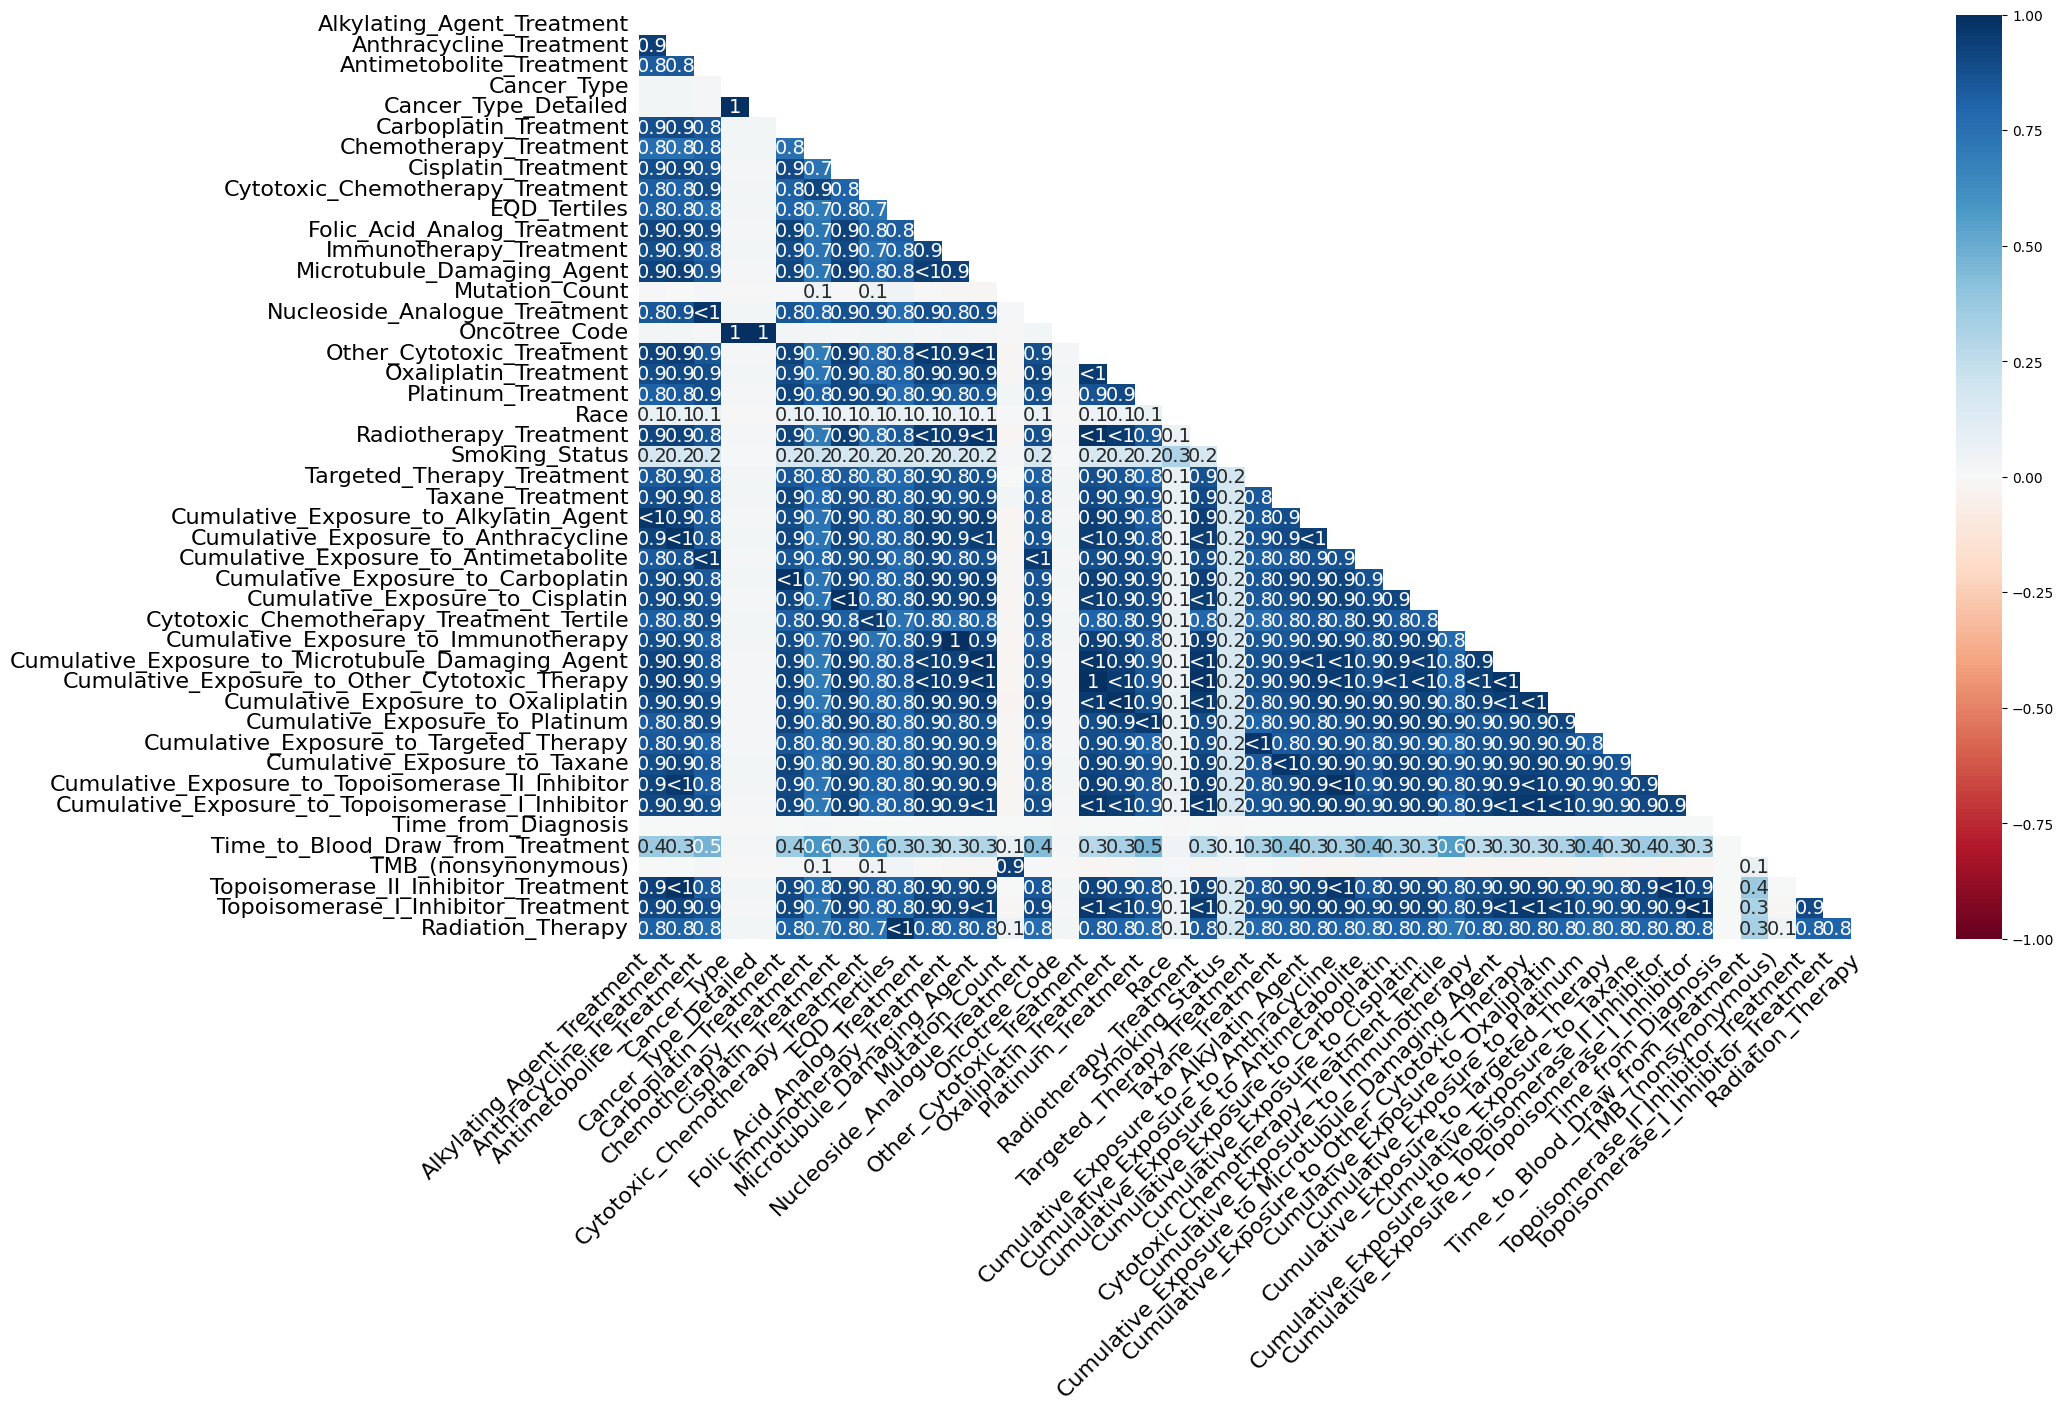

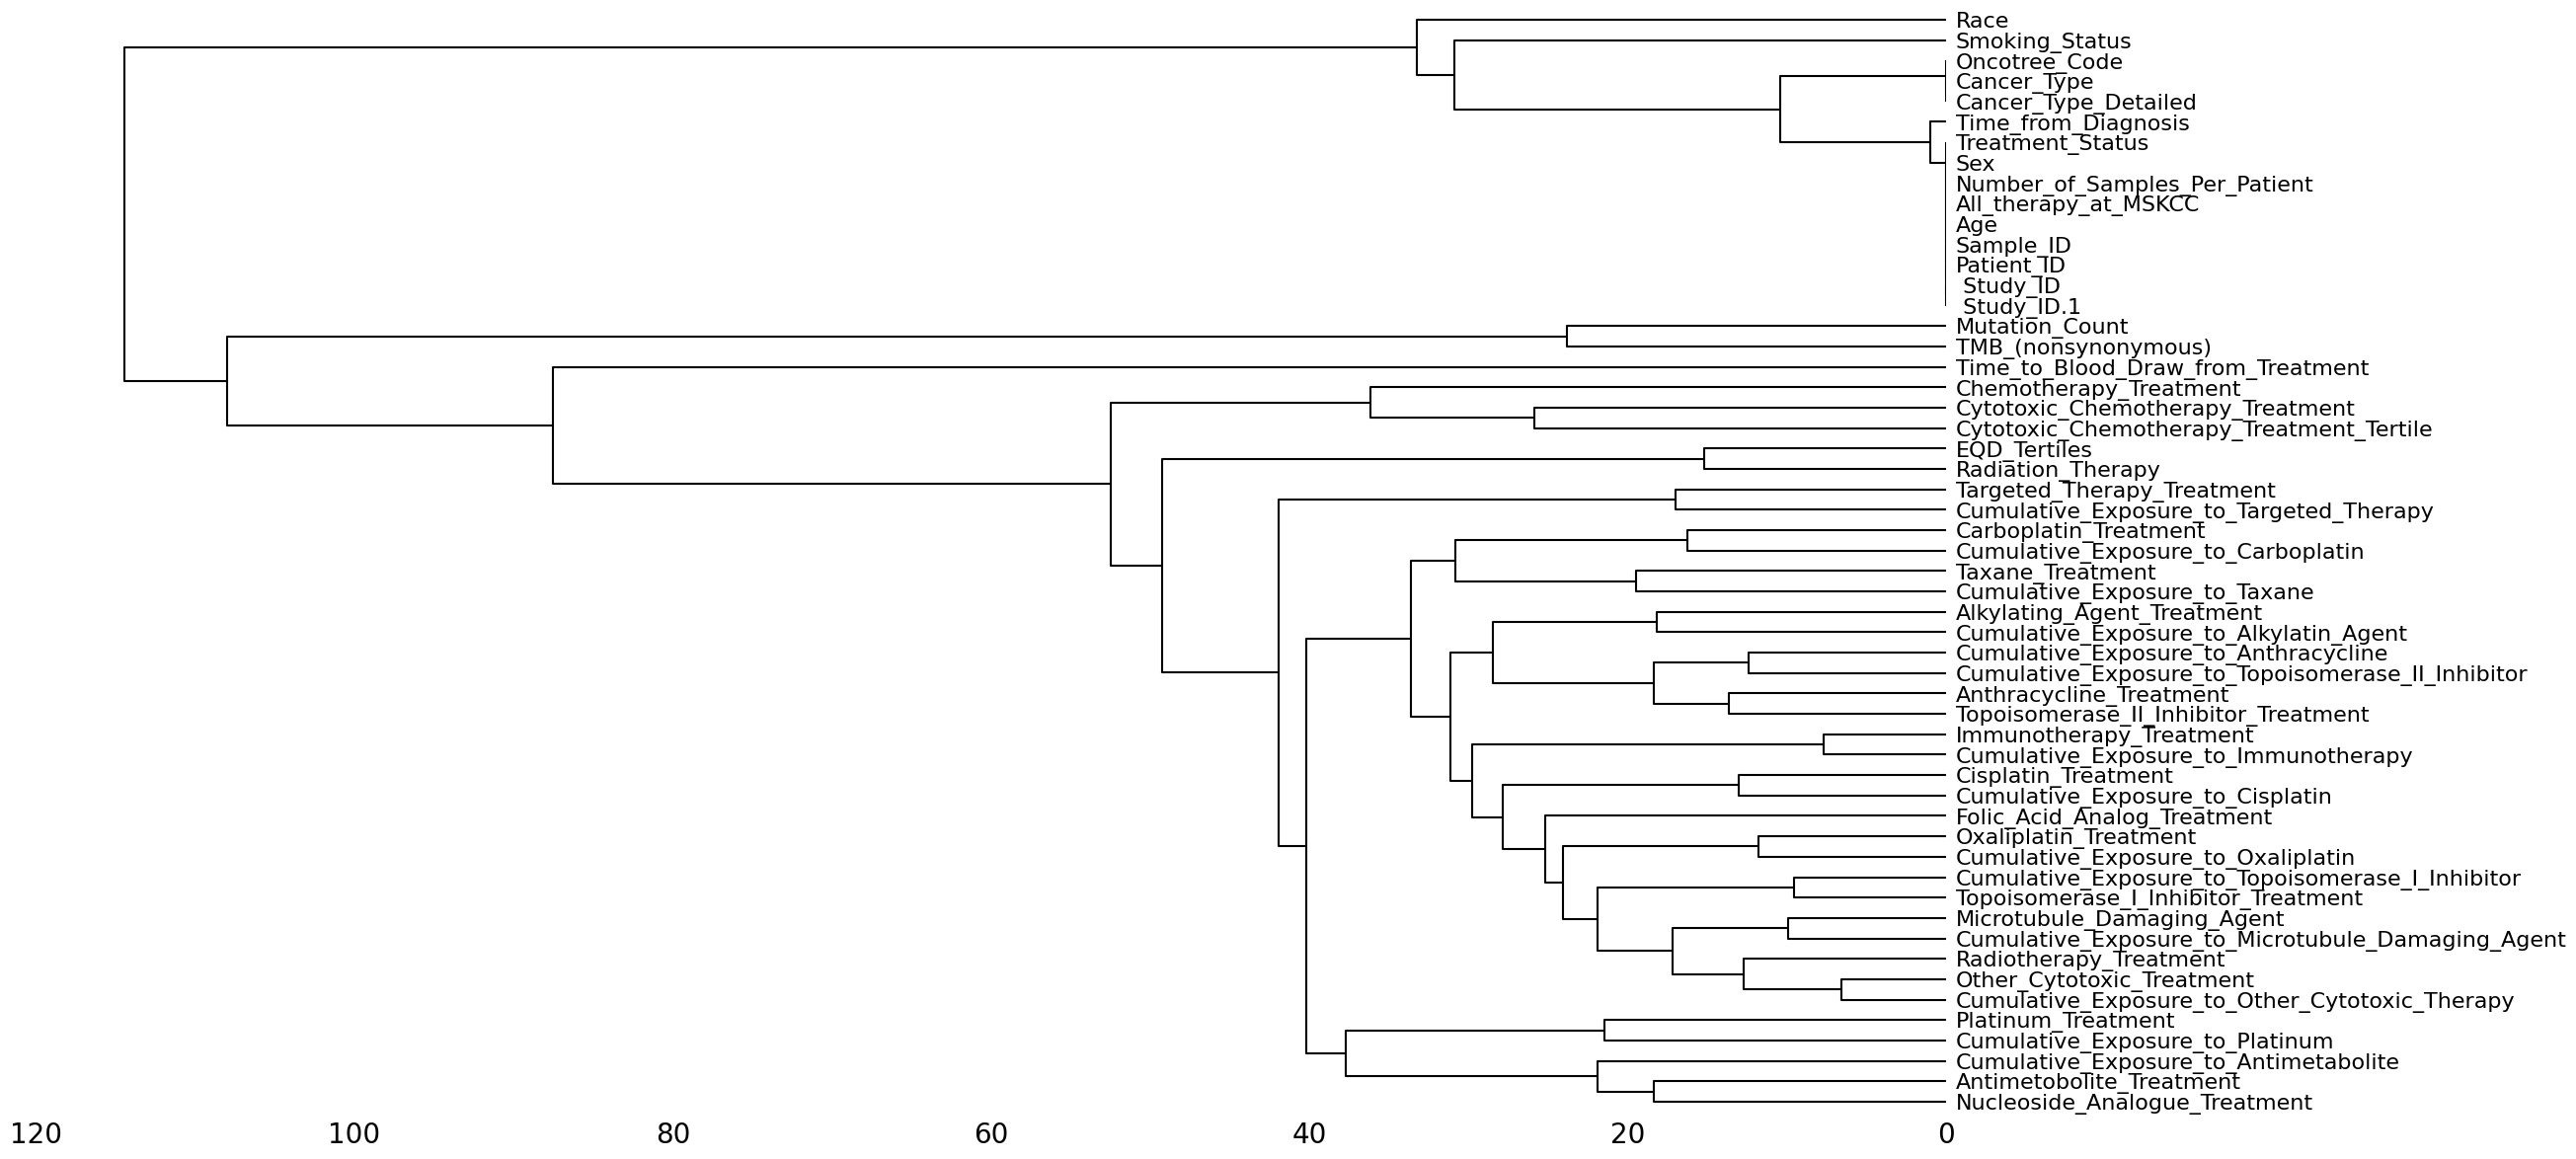

In [85]:

import missingno as msno


df.info()
df.isna().sum()

# Visualizing the missing values

# Barplot
# The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:
msno.bar(df)

# Matrix Plot
# The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.
msno.matrix(df)

# Heatmap
# The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.
#
# Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
#
# Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
msno.heatmap(df)

# Dendrogram
# The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.
#
# If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.
msno.dendrogram(df)





Validate data to fill missing values (Munging)

In [86]:
#Filling Missing values
# This method fills each missing row with the value of the nearest one above it.
df.fillna(method='ffill', inplace=True)
# It fills each missing row in the DataFrame with the nearest value below it.
df.fillna(method='bfill', inplace=True)
#Validating missing data


print("Data Completeness completed ...");

Data Completeness completed ...


Visualizing Missing Data and Validate data to check missing values (After Cleaning)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24146 entries, 0 to 24145
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0    Study_ID                                          24146 non-null  object 
 1    Study_ID.1                                        24146 non-null  object 
 2   Patient_ID                                         24146 non-null  object 
 3   Sample_ID                                          24146 non-null  object 
 4   Age                                                24146 non-null  float64
 5   Alkylating_Agent_Treatment                         24146 non-null  object 
 6   All_therapy_at_MSKCC                               24146 non-null  object 
 7   Anthracycline_Treatment                            24146 non-null  object 
 8   Antimetobolite_Treatment                           24146 non-null  object 
 9   Cancer

/Users/amulyamurahari/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/amulyamurahari/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/amulyamurahari/Library/Python/3.9/lib/python/site-packages/scipy/cluster/hierarchy.py:2874: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([dvw, 0])


<AxesSubplot: >

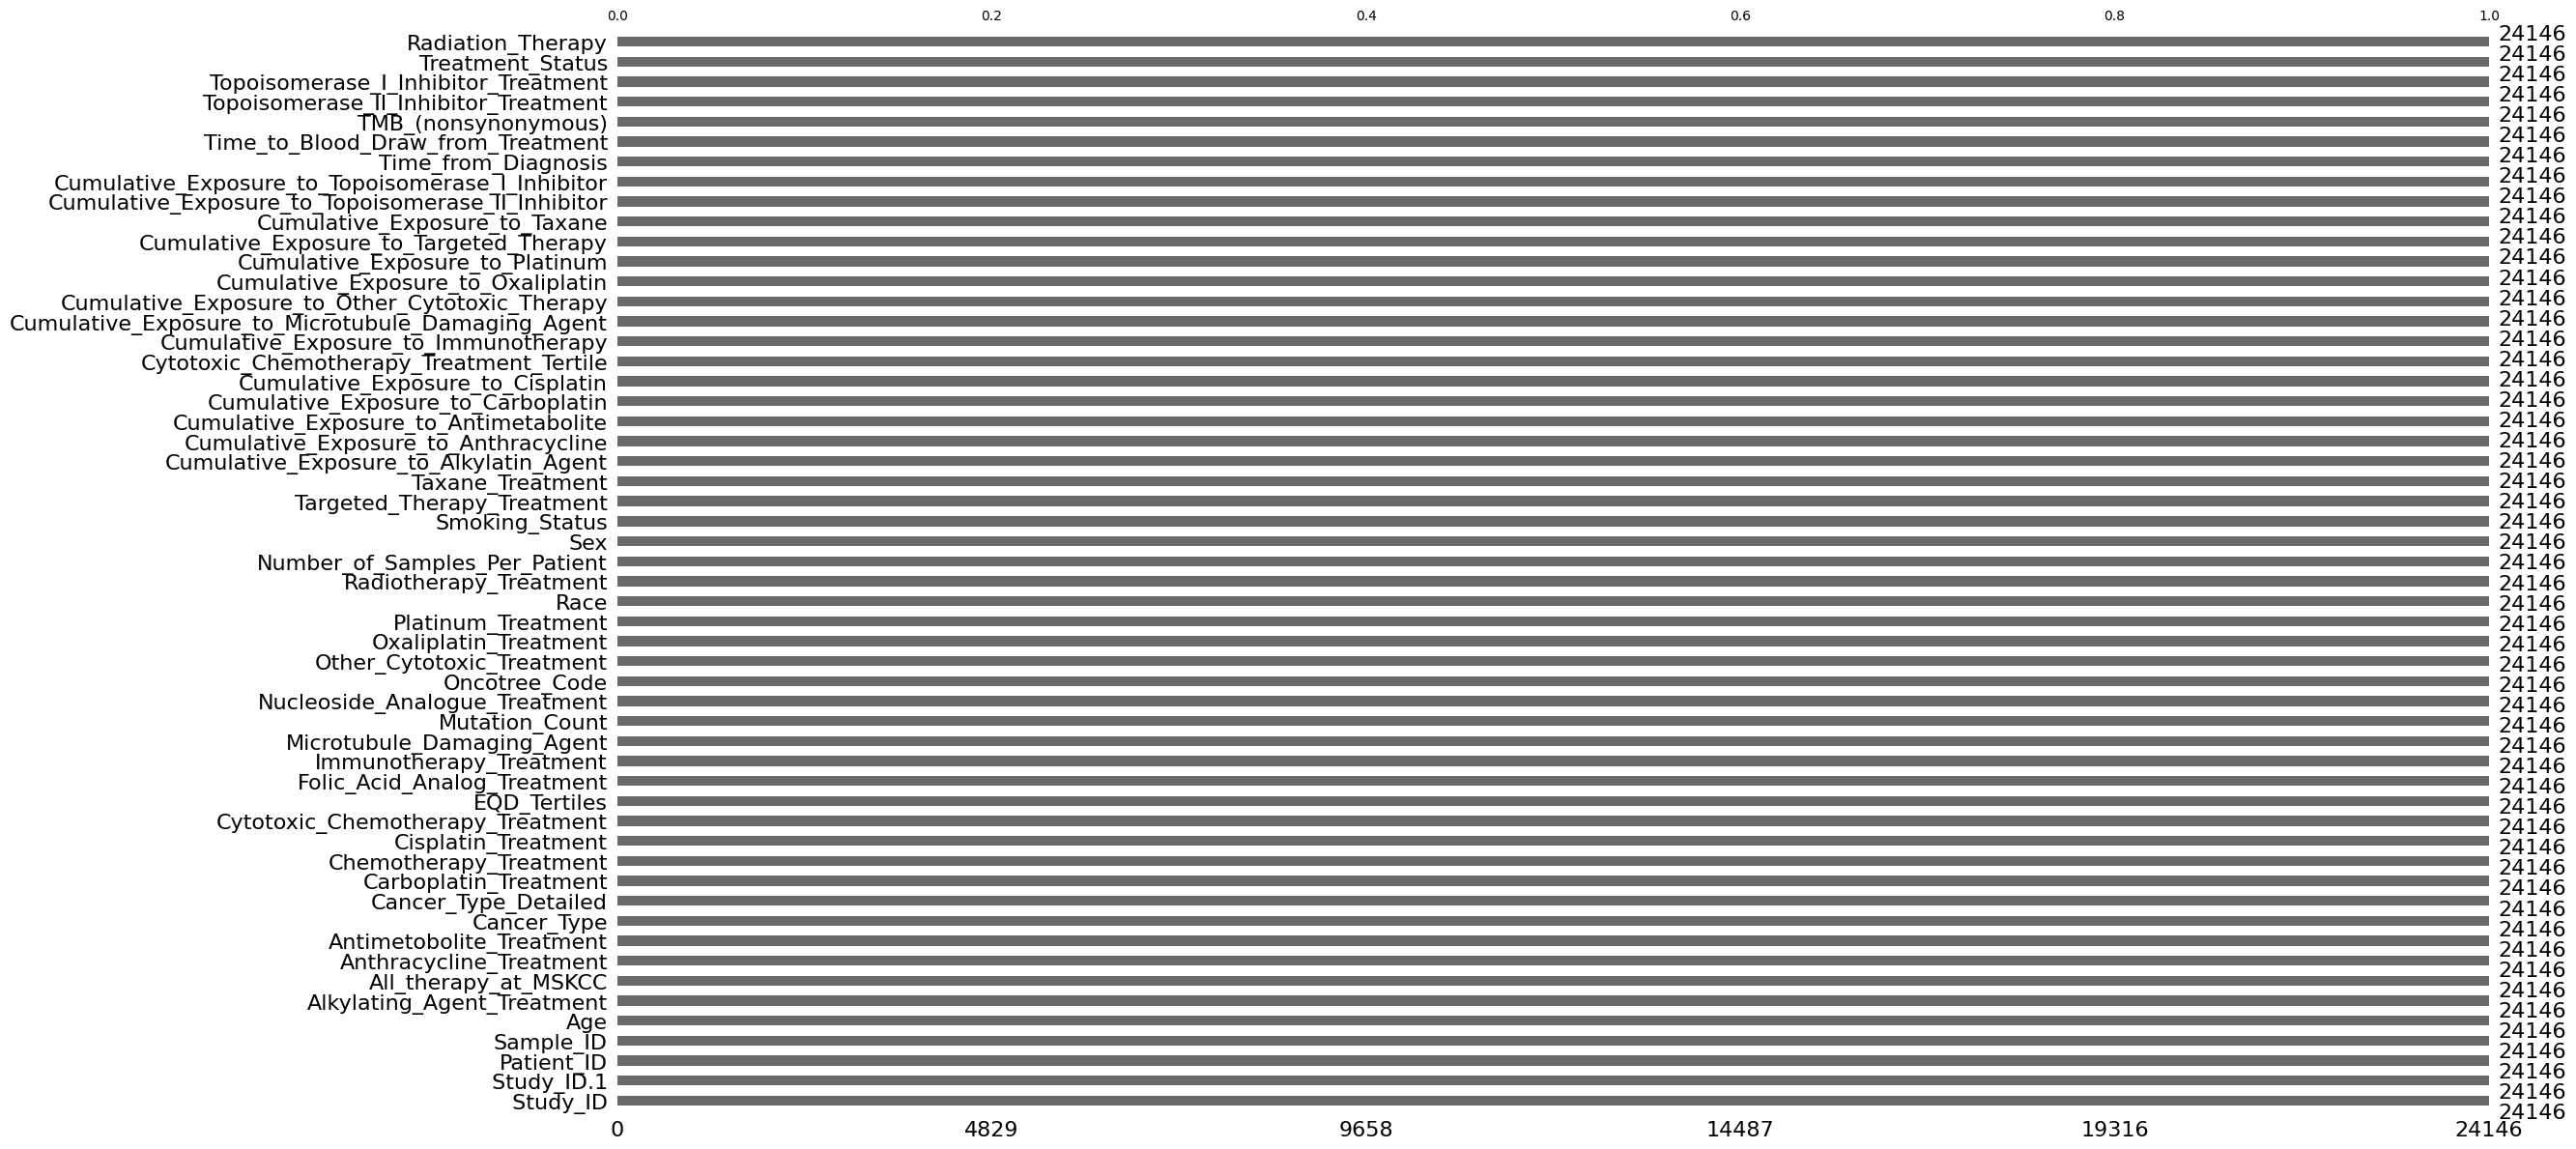

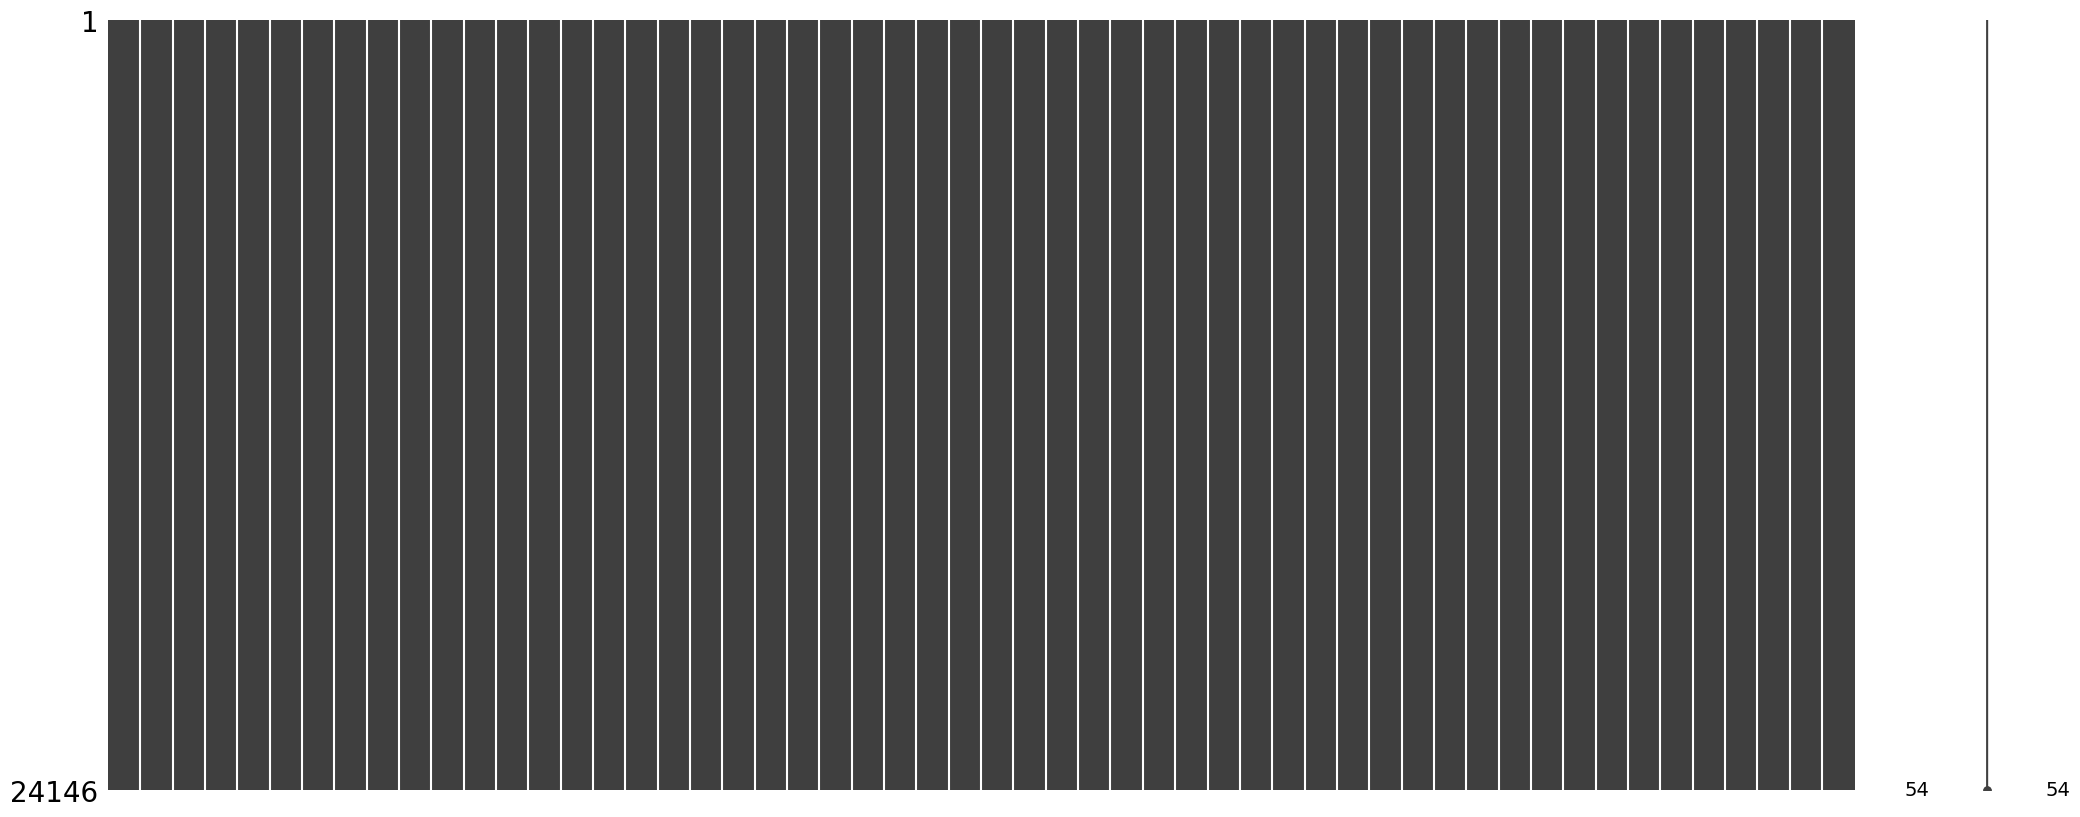

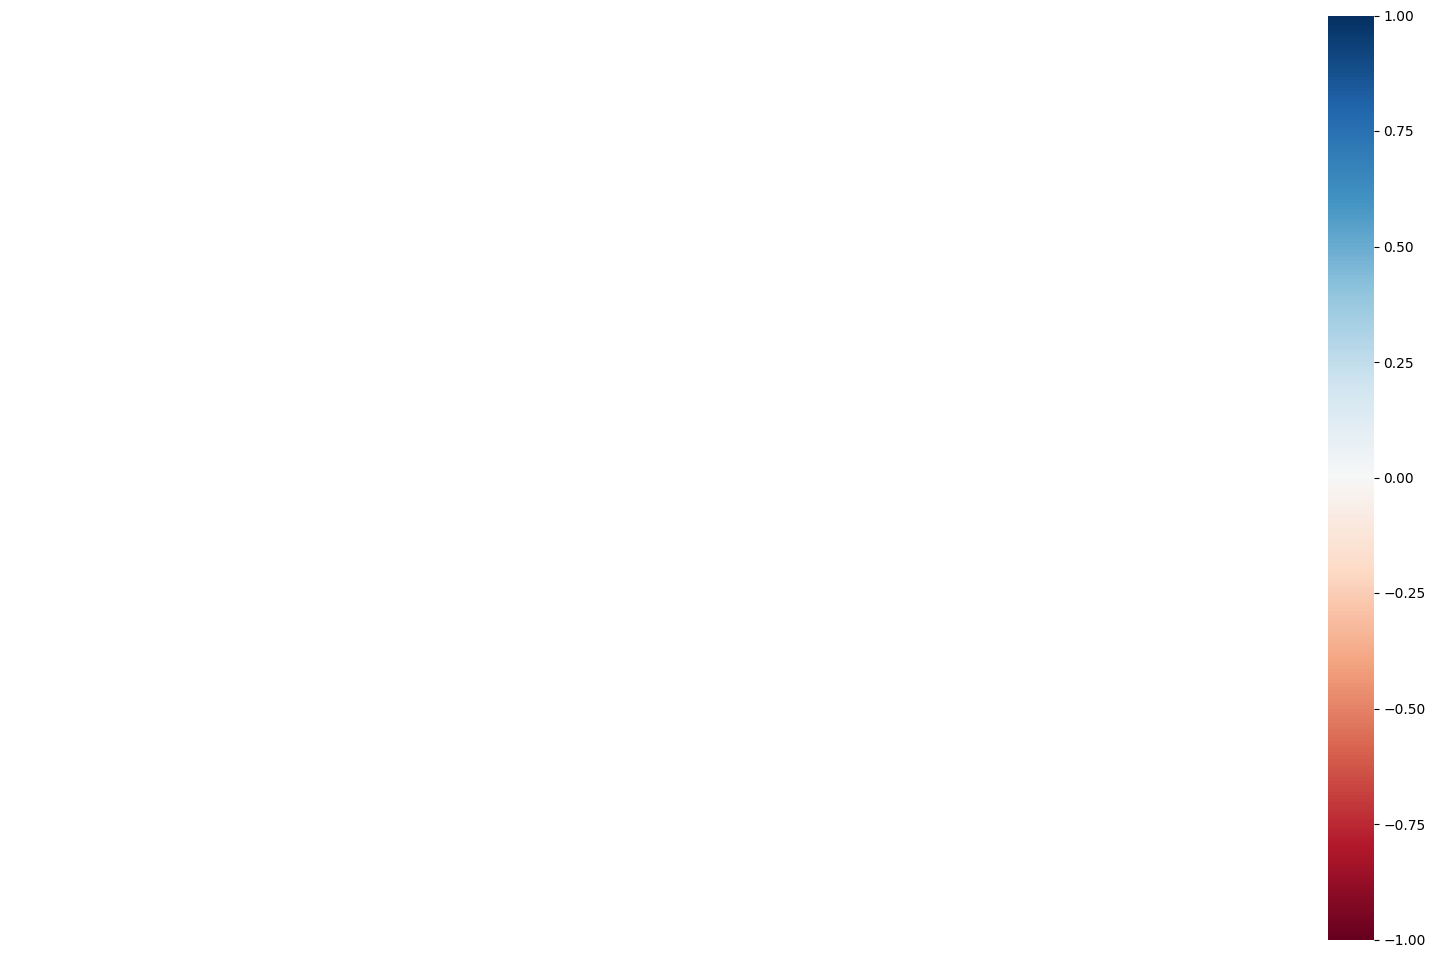

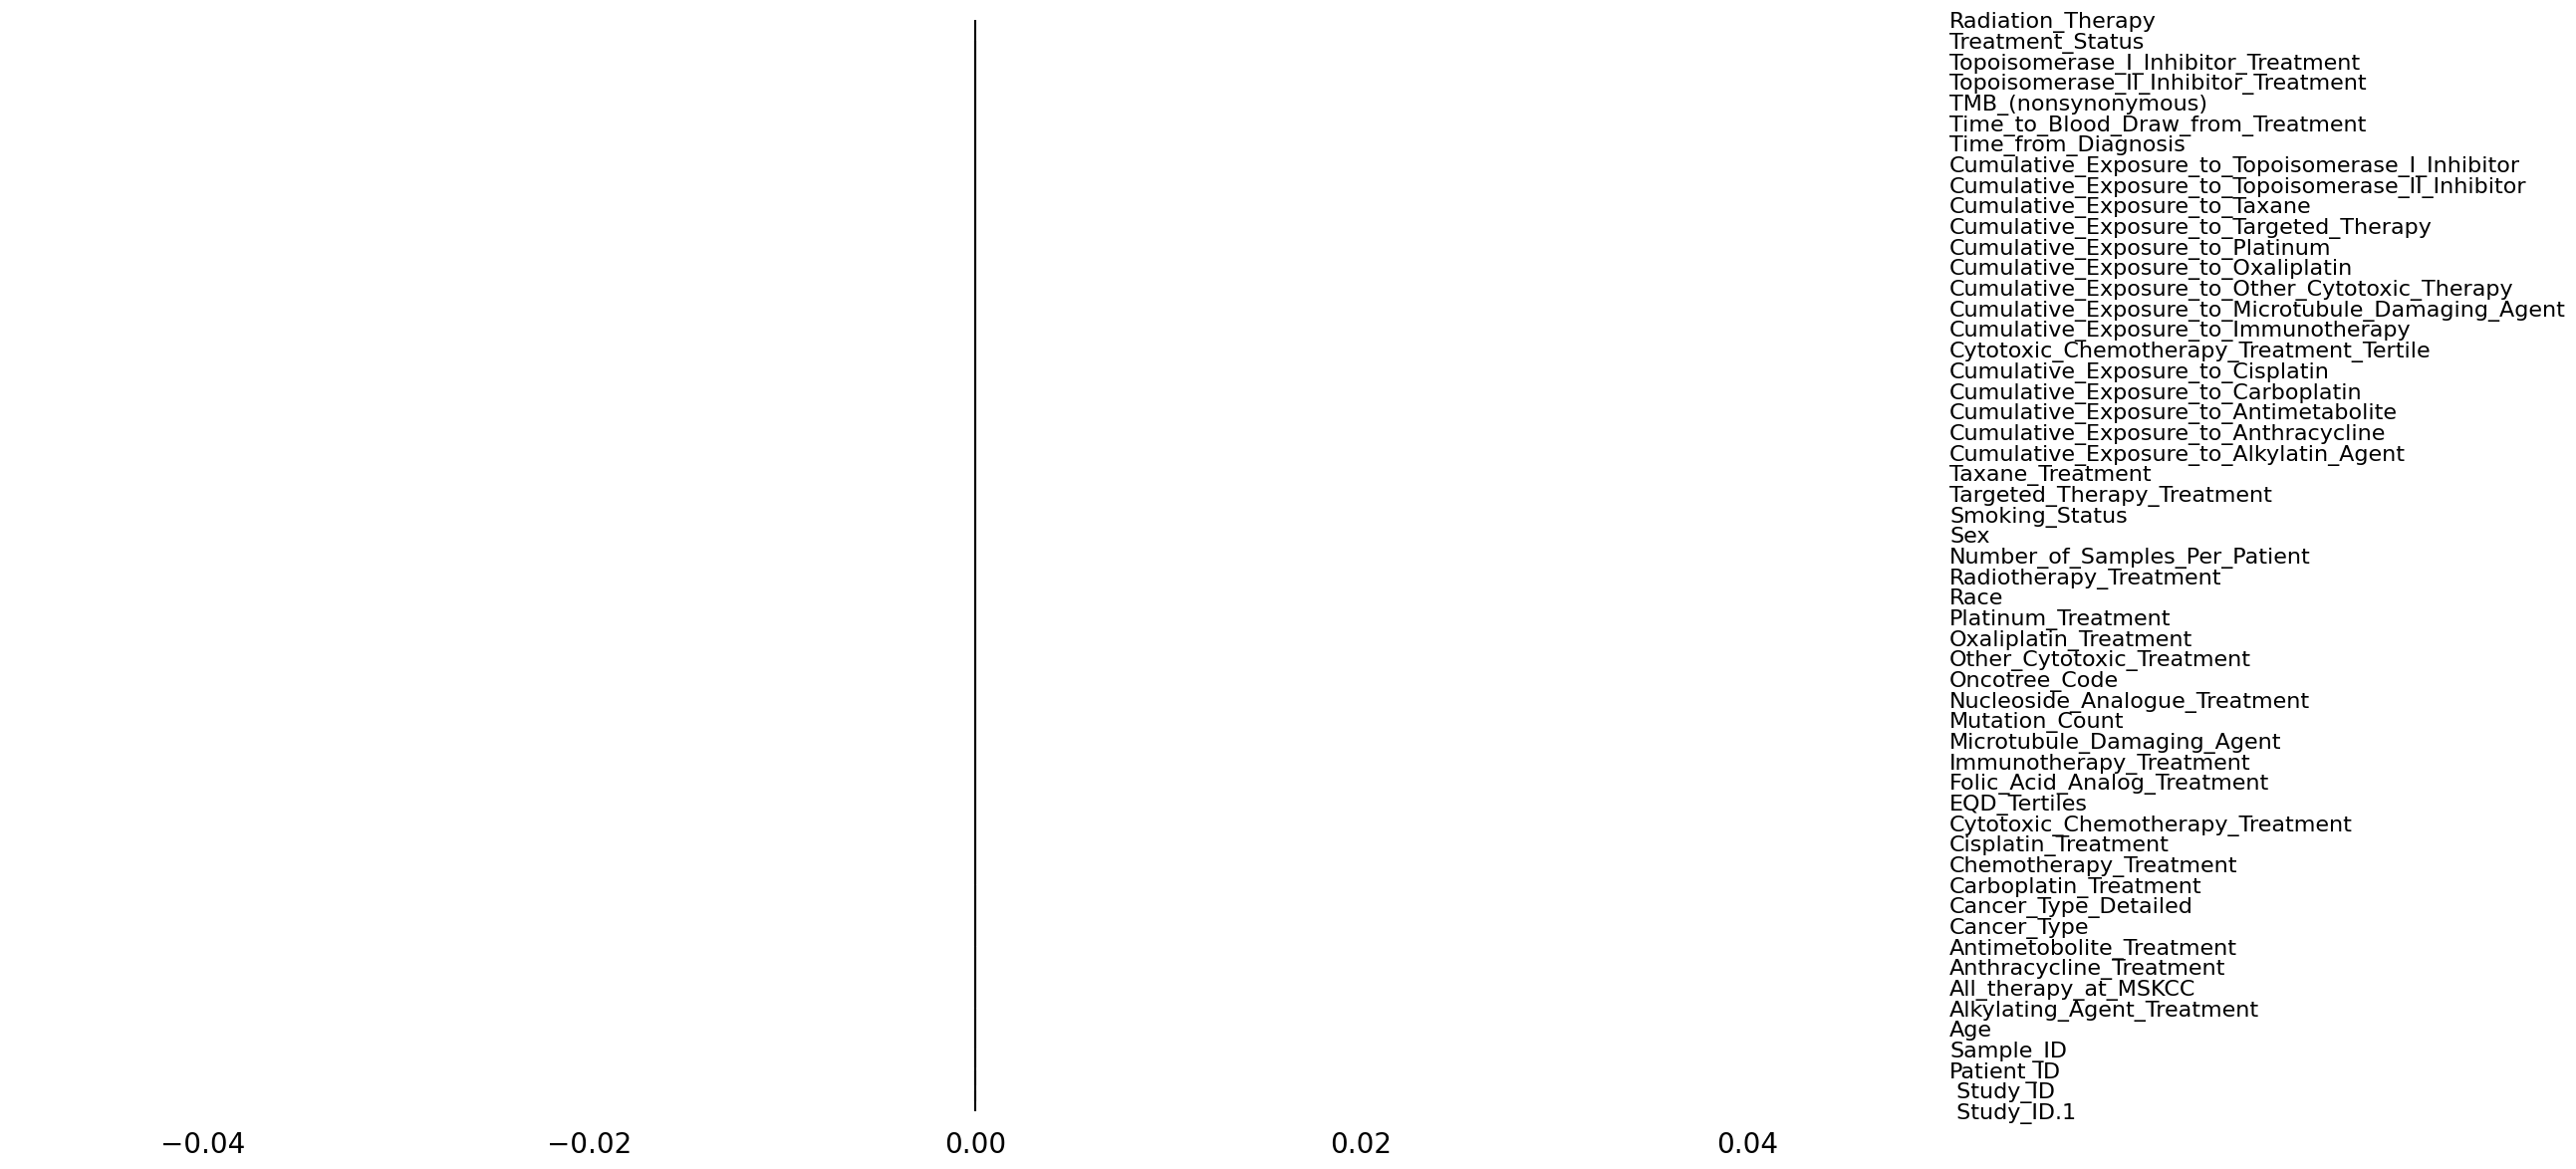

In [87]:
import missingno as msno


df.info()

df.isna().sum()

# Visualizing the missing values

# Barplot
# The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:
msno.bar(df)
# Matrix Plot
# The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.
msno.matrix(df)
# Heatmap
# The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.
#
# Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
#
# Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
msno.heatmap(df)
# Dendrogram
# The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.
#
# If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.
msno.dendrogram(df)

In [88]:
#PATIENT TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS PATIENT;''')
conn.execute('''CREATE TABLE IF NOT EXISTS PATIENT
         (
         Patient_ID TEXT PRIMARY KEY,
         Sample_ID TEXT  ,
         Age INTEGER ,
         Race TEXT  ,
         Sex TEXT   ,
         Number_of_Samples_Per_Patient INTEGER,
         Smoking_Status TEXT
         );''')

print("Patient Table created successfully");

conn.close()

#CANCER_TYPE TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS CANCER_TYPE;''')
conn.execute('''CREATE TABLE IF NOT EXISTS CANCER_TYPE
        (
         Cancer_Type_ID INTEGER PRIMARY KEY AUTOINCREMENT,
         Cancer_Type TEXT ,
         Patient_ID  TEXT  ,
         Cancer_Type_Detailed  TEXT  ,
         All_therapy_at_MSKCC TEXT ,
         FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID));''')

print("Cancer_Type Table created successfully");

conn.close()

#DIAGNOSIS TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS DIAGNOSIS;''')
conn.execute('''CREATE TABLE IF NOT EXISTS DIAGNOSIS

         (Diagnosis_ID INTEGER PRIMARY KEY AUTOINCREMENT,
          Patient_ID TEXT,
          Time_From_Diagnosis INTEGER,
          Time_to_Blood_Draw_from_Treatment INTEGER,
          FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID));''')

print("Diagnosis Table created successfully");

conn.close()

#ANTIBIOTICS TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS ANTIBIOTICS;''')
conn.execute('''CREATE TABLE IF NOT EXISTS ANTIBIOTICS

         (Alkylating_Agent_Treatment_ID INTEGER PRIMARY KEY AUTOINCREMENT ,
          Alkylating_Agent_Treatment TEXT,
          Patient_ID TEXT,
          Cumulative_Exposure_to_Alkylatin_Agent TEXT,
          Anthracycline_Treatment TEXT,
          Cumulative_Exposure_to_Anthracycline TEXT,
          Targeted_Therapy_Treatment TEXT,
          Cumulative_Exposure_to_Targeted_Therapy TEXT,
          Taxane_Treatment TEXT,
          Cumulative_Exposure_to_Taxane TEXT,
          FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID) );''')

print("Antibiotics Table created successfully");

conn.close()



Opened database successfully
Patient Table created successfully
Opened database successfully
Cancer_Type Table created successfully
Opened database successfully
Diagnosis Table created successfully
Opened database successfully
Antibiotics Table created successfully


In [89]:
#RADIOTHERAPY TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS RADIOTHERAPY;''')
conn.execute('''CREATE TABLE IF NOT EXISTS RADIOTHERAPY
         (
          Radiation_Therapy_ID INTEGER PRIMARY KEY AUTOINCREMENT,
          Patient_ID TEXT,
          Immunotherapy_Treatment TEXT,
          Radiation_Therapy TEXT,
          Radiotherapy_Treatment TEXT,
          Cumulative_Exposure_to_Immunotherapy TEXT,
          FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID));''')

print("Radiotherapy Table created successfully");

conn.close()

#CHEMOTHERAPY TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS CHEMOTHERAPY;''')
conn.execute('''CREATE TABLE IF NOT EXISTS CHEMOTHERAPY

         (
          Chemotherapy_Treatment_ID INTEGER PRIMARY KEY AUTOINCREMENT,
          Chemotherapy_Treatment TEXT,
          Patient_ID TEXT,
          Cytotoxic_Chemotherapy_Treatment TEXT ,
          Cumulative_Exposure_to_Other_Cytotoxic_Therapy TEXT ,
          Oxaliplatin_Treatment TEXT ,
          Other_Cytotoxic_Treatment TEXT ,
          Cumulative_Exposure_to_Oxaliplatin TEXT ,
          Cytotoxic_Chemotherapy_Treatment_Tertile TEXT ,
          FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID));''')

print("Chemotherapy Table created successfully");

conn.close()

#ANTIMETABOLITE TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS ANTIMETABOLITE;''')
conn.execute('''CREATE TABLE IF NOT EXISTS ANTIMETABOLITE

         (
          Antimetabolite_Treatment_ID INTEGER PRIMARY KEY AUTOINCREMENT,
          Antimetobolite_Treatment TEXT,
          Patient_ID TEXT,
          Cumulative_Exposure_to_Antimetabolite TEXT,
          Carboplatin_Treatment  TEXT,
          Cumulative_Exposure_to_Carboplatin TEXT,
          Cisplatin_Treatment TEXT,
          Cumulative_Exposure_to_Cisplatin TEXT,
          Platinum_Treatment TEXT,
          Cumulative_Exposure_to_Platinum TEXT,
          FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID));''')

print("Antimetabolite Table created successfully");

conn.close()

#MICROTUBULE TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS MICROTUBULE;''')
conn.execute('''CREATE TABLE IF NOT EXISTS MICROTUBULE

         (
          Microtubule_ID  INTEGER PRIMARY KEY AUTOINCREMENT,
          EQD_Tertiles TEXT,
          Patient_ID TEXT,
          Oncotree_Code TEXT,
          Nucleoside_Analogue_Treatment  TEXT,
          Cumulative_Exposure_to_Microtubule_Damaging_Agent TEXT,
          Mutation_Count INTEGER,
          Folic_Acid_Analog_Treatment TEXT,
          FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID));''')

print("Microtubule Table created successfully");

conn.close()


#TOPOISOMERASE TABLE
conn = sqlite3.connect('cancer.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS TOPOISOMERASE;''')
conn.execute('''CREATE TABLE IF NOT EXISTS TOPOISOMERASE

         (Topoisomerase_Treatment_ID INTEGER PRIMARY KEY AUTOINCREMENT,
          Cumulative_Exposure_to_Topoisomerase_I_Inhibitor TEXT,
          Patient_ID TEXT,
          Cumulative_Exposure_to_Topoisomerase_II_Inhibitor TEXT,
          Topoisomerase_I_Inhibitor_Treatment TEXT,
          Topoisomerase_II_Inhibitor_Treatment TEXT,
          FOREIGN KEY(Patient_ID) REFERENCES PATIENT(Patient_ID));''')

print("Topoisomerase Table created successfully");

conn.close()


Opened database successfully
Radiotherapy Table created successfully
Opened database successfully
Chemotherapy Table created successfully
Opened database successfully
Antimetabolite Table created successfully
Opened database successfully
Microtubule Table created successfully
Opened database successfully
Topoisomerase Table created successfully


In [90]:
#INSERT PATIENT TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO PATIENT(Patient_ID, Sample_ID, Age, Race, Sex, Number_of_Samples_Per_Patient, Smoking_Status) VALUES (?,?,?,?,?,?,?)',(
                row.Patient_ID, 
                row.Sample_ID,
                row.Age,
                row.Race,
                row.Sex,
                row.Number_of_Samples_Per_Patient,
                row.Smoking_Status
                )
                )
    conn.commit()
conn.close()

#INSERT CANCER_TYPE TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO CANCER_TYPE( Cancer_Type, Patient_ID, Cancer_Type_Detailed, All_therapy_at_MSKCC) VALUES (?,?,?,?)',(
                row.Cancer_Type,
                row.Patient_ID,
                row.Cancer_Type_Detailed,
                row.All_therapy_at_MSKCC
                )
                )
    conn.commit()
conn.close()

#INSERT DIAGNOSIS TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO DIAGNOSIS( Patient_ID, Time_from_Diagnosis, Time_to_Blood_Draw_from_Treatment ) VALUES (?,?,?)',(
                row.Patient_ID,
                row.Time_from_Diagnosis,
                row.Time_to_Blood_Draw_from_Treatment
                )
                )
    conn.commit()
conn.close()


#INSERT ANTIBIOTICS TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO ANTIBIOTICS( Alkylating_Agent_Treatment, Patient_ID, Cumulative_Exposure_to_Alkylatin_Agent, Anthracycline_Treatment, Cumulative_Exposure_to_Anthracycline, Targeted_Therapy_Treatment, Cumulative_Exposure_to_Targeted_Therapy, Taxane_Treatment, Cumulative_Exposure_to_Taxane) VALUES (?,?,?,?,?,?,?,?,?)',(
                row.Alkylating_Agent_Treatment,
                row.Patient_ID,
                row.Cumulative_Exposure_to_Alkylatin_Agent,
                row.Anthracycline_Treatment,
                row.Cumulative_Exposure_to_Anthracycline,
                row.Targeted_Therapy_Treatment,
                row.Cumulative_Exposure_to_Targeted_Therapy,
                row.Taxane_Treatment,
                row.Cumulative_Exposure_to_Taxane
                )
                )
    conn.commit()
conn.close()


#INSERT RADIOTHERAPY TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO RADIOTHERAPY( Patient_ID, Immunotherapy_Treatment, Radiation_Therapy, Radiotherapy_Treatment, Cumulative_Exposure_to_Immunotherapy) VALUES (?,?,?,?,?)',(
                row.Patient_ID,
                row.Immunotherapy_Treatment,
                row.Radiation_Therapy,
                row.Radiotherapy_Treatment,
                row.Cumulative_Exposure_to_Immunotherapy
                )
                )
    conn.commit()
conn.close()


#INSERT CHEMOTHERAPY TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO CHEMOTHERAPY( Chemotherapy_Treatment, Patient_ID, Cytotoxic_Chemotherapy_Treatment, Cumulative_Exposure_to_Other_Cytotoxic_Therapy, Oxaliplatin_Treatment,Other_Cytotoxic_Treatment, Cumulative_Exposure_to_Oxaliplatin, Cytotoxic_Chemotherapy_Treatment_Tertile) VALUES (?,?,?,?,?,?,?,?)',(
                row.Chemotherapy_Treatment,
                row.Patient_ID,
                row.Cytotoxic_Chemotherapy_Treatment,
                row.Cumulative_Exposure_to_Other_Cytotoxic_Therapy,
                row.Oxaliplatin_Treatment,
                row.Other_Cytotoxic_Treatment,
                row.Cumulative_Exposure_to_Oxaliplatin,
                row.Cytotoxic_Chemotherapy_Treatment_Tertile
                )
                )
    conn.commit()
conn.close()


#INSERT ANTIMETABOLITE TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO ANTIMETABOLITE( Antimetobolite_Treatment,Patient_ID, Cumulative_Exposure_to_Antimetabolite, Carboplatin_Treatment, Cumulative_Exposure_to_Carboplatin,Cisplatin_Treatment, Cumulative_Exposure_to_Cisplatin,Platinum_Treatment, Cumulative_Exposure_to_Platinum) VALUES (?,?,?,?,?,?,?,?,?)',(
                row.Antimetobolite_Treatment,
                row.Patient_ID,
                row.Cumulative_Exposure_to_Antimetabolite,
                row.Carboplatin_Treatment,
                row.Cumulative_Exposure_to_Carboplatin,
                row.Cisplatin_Treatment,
                row.Cumulative_Exposure_to_Cisplatin,
                row.Platinum_Treatment,
                row.Cumulative_Exposure_to_Platinum
                )
                )
    conn.commit()
conn.close()


#INSERT MICROTUBULE TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO MICROTUBULE( EQD_Tertiles, Patient_ID, Oncotree_Code, Nucleoside_Analogue_Treatment, Cumulative_Exposure_to_Microtubule_Damaging_Agent,Mutation_Count, Folic_Acid_Analog_Treatment ) VALUES (?,?,?,?,?,?,?)',
               (
                row.EQD_Tertiles,
                row.Patient_ID,
                row.Oncotree_Code,
                row.Nucleoside_Analogue_Treatment,
                row.Cumulative_Exposure_to_Microtubule_Damaging_Agent,
                row.Mutation_Count,
                row.Folic_Acid_Analog_Treatment
                )
                )
    conn.commit()
conn.close()


#INSERT TOPOISOMERASE TABLE VALUES
conn = sqlite3.connect('cancer.db')
for row in df.itertuples():
    conn.execute('INSERT INTO TOPOISOMERASE( Cumulative_Exposure_to_Topoisomerase_I_Inhibitor, Patient_ID, Cumulative_Exposure_to_Topoisomerase_II_Inhibitor, Topoisomerase_I_Inhibitor_Treatment, Topoisomerase_II_Inhibitor_Treatment ) VALUES (?,?,?,?,?)',
               (
                row.Cumulative_Exposure_to_Topoisomerase_I_Inhibitor,
                row.Patient_ID,
                row.Cumulative_Exposure_to_Topoisomerase_II_Inhibitor,
                row.Topoisomerase_I_Inhibitor_Treatment,
                row.Topoisomerase_II_Inhibitor_Treatment
                )
                )
    conn.commit()
conn.close()

print("Data inserted :)");








Data inserted :)


Query 1  -  Number of Mutation in Cancer Patients

In [97]:
import sqlite3
import pandas as pd

con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS No_Of_Mutations;''')
q1 = (
con.execute('''CREATE VIEW No_Of_Mutations AS
SELECT  P.Patient_ID,P.Sample_ID,M.Mutation_Count
FROM PATIENT P
LEFT JOIN MICROTUBULE M
    ON P.Patient_ID = M.Patient_ID
UNION
SELECT  P.Patient_ID,P.Sample_ID,M.Mutation_Count
FROM MICROTUBULE M
LEFT JOIN PATIENT P
    ON P.Patient_ID = M.Patient_ID;'''))

q1 = (con.execute(''' SELECT * FROM No_Of_Mutations;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM No_Of_Mutations;''', con)
r1.head(1)
print(r1)


# Plotting Graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(r1['Mutation_Count'], r1['Mutation_Count'], color ='maroon',
        width = 0.4)
plt.xlabel("Mutation_Count")
plt.ylabel("No of mutations")
plt.title("Number of Mutation in Cancer Patients")
plt.show()

con.close()

OperationalError: database is locked

Query 2 - Time to draw blood from the patient

In [92]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Time_to_draw_blood;''')
q1 = (
con.execute('''CREATE VIEW Time_to_draw_blood AS
SELECT  P.Patient_ID,P.Sample_ID,D.Time_to_Blood_Draw_from_Treatment
FROM PATIENT P
LEFT JOIN DIAGNOSIS D
    ON P.Patient_ID = D.Patient_ID
UNION
SELECT  P.Patient_ID,P.Sample_ID,D.Time_to_Blood_Draw_from_Treatment
FROM DIAGNOSIS D
LEFT JOIN PATIENT P
    ON P.Patient_ID = D.Patient_ID;'''))

q1 = (con.execute(''' SELECT * FROM Time_to_draw_blood;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Time_to_draw_blood;''', con)
r1.head(1)
print(r1)

# Plotting Graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(r1['Time_to_Blood_Draw_from_Treatment'], r1['Time_to_Blood_Draw_from_Treatment'], color ='maroon',
        width = 0.4)
plt.xlabel("Time_to_Blood_Draw_from_Treatment")
plt.ylabel("No of Time_to_Blood_Draw_from_Treatment")
plt.title("Time_to_Blood_Draw_from_Treatment in Cancer Patients")
plt.show()

con.close()

OperationalError: database is locked

Query 3 -  Time_from_Diagnosis

In [95]:
import sqlite3
import pandas as pd

con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Time_from_Diagnosis;''')
q1 = (
con.execute('''CREATE VIEW Time_from_Diagnosis AS
SELECT  P.Patient_ID,P.Sample_ID,D.Time_from_Diagnosis
FROM PATIENT P
LEFT JOIN DIAGNOSIS D
    ON P.Patient_ID = D.Patient_ID
UNION
SELECT  P.Patient_ID,P.Sample_ID,D.Time_from_Diagnosis
FROM DIAGNOSIS D
LEFT JOIN PATIENT P
    ON P.Patient_ID = D.Patient_ID;'''))


q1 = (con.execute(''' SELECT * FROM Time_from_Diagnosis;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Time_from_Diagnosis;''', con)
r1.head(1)
print(r1)

# Plotting Graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(r1['Time_From_Diagnosis'], r1['Time_From_Diagnosis'], color ='maroon',
        width = 0.4)
plt.xlabel("Time_from_Diagnosis")
plt.ylabel("No of Time")
plt.title("Time_from_Diagnosis in Cancer Patients")
plt.show()

con.close()

OperationalError: database is locked

Query 4 - Smoking Status

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Smoking_Status;''')
q1 = (
con.execute('''CREATE VIEW Smoking_Status AS
SELECT  P1.Smoking_Status,COUNT(P1.Smoking_Status)
FROM PATIENT P1
LEFT JOIN PATIENT p2
    ON P1.Patient_ID = P2.Patient_ID
GROUP BY P1.Smoking_Status
ORDER BY P1.Smoking_Status;'''))


q1 = (con.execute(''' SELECT * FROM Time_from_Diagnosis;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Time_from_Diagnosis;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Smoking_Status']
data = r1['COUNT(P1.Smoking_Status)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()


con.close()

Query 5 - Treatment Status

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Treatment_Status;''')
q1 = (
con.execute('''CREATE VIEW Treatment_Status AS
SELECT  D.Carboplatin_Treatment,COUNT(D.Carboplatin_Treatment)
FROM ANTIMETABOLITE D
LEFT JOIN PATIENT P
    ON P.Patient_ID = D.Patient_ID
GROUP BY D.Carboplatin_Treatment
;'''))


q1 = (con.execute(''' SELECT * FROM Treatment_Status;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Treatment_Status;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Carboplatin_Treatment']
data = r1['COUNT(D.Carboplatin_Treatment)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()

Query 6 - Cisplatin Treatment 

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Cisplatin_Treatment;''')
q1 = (
con.execute('''CREATE VIEW Cisplatin_Treatment AS
SELECT  D.Cisplatin_Treatment,COUNT(D.Cisplatin_Treatment)
FROM ANTIMETABOLITE D
LEFT JOIN PATIENT P
    ON P.Patient_ID = D.Patient_ID
GROUP BY D.Cisplatin_Treatment
;'''))


q1 = (con.execute(''' SELECT * FROM Cisplatin_Treatment;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Cisplatin_Treatment;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Cisplatin_Treatment']
data = r1['COUNT(D.Cisplatin_Treatment)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()

Query 7 - Antimetobolite_Treatment

In [ ]:
# Query 7 - Antimetobolite_Treatment
import sqlite3
import pandas as pd
con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Antimetobolite_Treatment;''')

q1 = (
con.execute('''CREATE VIEW Antimetobolite_Treatment AS
SELECT  D.Antimetobolite_Treatment,COUNT(D.Antimetobolite_Treatment)
FROM ANTIMETABOLITE D
LEFT JOIN PATIENT P
    ON P.Patient_ID = D.Patient_ID
GROUP BY D.Antimetobolite_Treatment
;
''' ))

q1 = (con.execute(''' SELECT * FROM Antimetobolite_Treatment;'''))

# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Antimetobolite_Treatment;''', con)
r1.head(5)
print(r1)



# Import libraries
from matplotlib import pyplot as plt
import numpy as np



# Creating dataset
labels = r1['Antimetobolite_Treatment']
data = r1['COUNT(D.Antimetobolite_Treatment)']



# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)



# show plot
plt.show()

con.close()

Query 8 - Anthracycline_Treatment

In [ ]:
# Query 8 - Anthracycline_Treatment

import sqlite3
import pandas as pd
con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Anthracycline_Treatment;''')
q1 = (
con.execute('''CREATE VIEW Anthracycline_Treatment AS
 SELECT D.Anthracycline_Treatment,COUNT(D.Anthracycline_Treatment)
 FROM ANTIBIOTICS D
 LEFT JOIN PATIENT P
 ON P.Patient_ID = D.Patient_ID
GROUP BY D.Anthracycline_Treatment
;
'''))


q1 = (con.execute(''' SELECT * FROM Anthracycline_Treatment;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql('''SELECT * FROM Anthracycline_Treatment;''', con)
r1.head(5)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Anthracycline_Treatment']
data = r1['COUNT(D.Anthracycline_Treatment)']
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()

Query 9 - Alkylating_Agent_Treatment

In [ ]:
# Query 9 - Alkylating_Agent_Treatment
import sqlite3
import pandas as pd
con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Alkylating_Agent_Treatment;''')
q1 = (
con.execute('''CREATE VIEW Alkylating_Agent_Treatment AS
SELECT  D.Alkylating_Agent_Treatment,COUNT(D.Alkylating_Agent_Treatment)
FROM ANTIBIOTICS D
LEFT JOIN PATIENT P
    ON P.Patient_ID = D.Patient_ID
GROUP BY D.Alkylating_Agent_Treatment
;
'''
      ))

q1 = (con.execute(''' SELECT * FROM Alkylating_Agent_Treatment;'''))

# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Alkylating_Agent_Treatment;''', con)
r1.head(5)
print(r1)



# Import libraries
from matplotlib import pyplot as plt
import numpy as np



# Creating dataset
labels = r1['Alkylating_Agent_Treatment']
data = r1['COUNT(D.Alkylating_Agent_Treatment)']



# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)



# show plot
plt.show()

con.close()

Query 10 - EQD_Tertiles

In [ ]:
# Query 10 - EQD_Tertiles
import sqlite3
import pandas as pd
con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS EQD_Tertiles;''')
q1 = (
con.execute('''CREATE VIEW EQD_Tertiles AS
SELECT  D.EQD_Tertiles,COUNT(D.EQD_Tertiles)
FROM MICROTUBULE D
LEFT JOIN PATIENT P
    ON P.Patient_ID = D.Patient_ID
GROUP BY D.EQD_Tertiles
;
''' ))

q1 = (con.execute(''' SELECT * FROM EQD_Tertiles;'''))

# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql('''  SELECT * FROM EQD_Tertiles;''', con)
r1.head(5)
print(r1)



# Import libraries
from matplotlib import pyplot as plt
import numpy as np



# Creating dataset
labels = r1['EQD_Tertiles']
data = r1['COUNT(D.EQD_Tertiles)']



# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)



# show plot
plt.show()

con.close()

Query 11 - Race

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Race;''')
q1 = (
con.execute('''CREATE VIEW Race AS
SELECT  P1.Race,COUNT(P1.Race)
FROM PATIENT P1
LEFT JOIN PATIENT p2
    ON P1.Patient_ID = P2.Patient_ID
GROUP BY P1.Race
ORDER BY P1.Race
;'''))

q1 = (con.execute(''' SELECT * FROM Race;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Race;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Race']
data = r1['COUNT(P1.Race)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()

Query 12 - All_Therapy_At_MSKCC

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS All_therapy_at_MSKCC;''')
q1 = (
con.execute('''CREATE VIEW All_therapy_at_MSKCC AS
SELECT  C.All_therapy_at_MSKCC,COUNT(C.All_therapy_at_MSKCC)
FROM CANCER_TYPE C
LEFT JOIN PATIENT P
    ON C.Patient_ID = P.Patient_ID
GROUP BY C.All_therapy_at_MSKCC
ORDER BY C.All_therapy_at_MSKCC;'''))


q1 = (con.execute(''' SELECT * FROM All_therapy_at_MSKCC;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM All_therapy_at_MSKCC;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['All_therapy_at_MSKCC']
data = r1['COUNT(C.All_therapy_at_MSKCC)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()

Query 13 - Platinum Treatment

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Platinum_Treatment;''')
q1 = (
con.execute('''CREATE VIEW Platinum_Treatment AS
SELECT  A.Platinum_Treatment,COUNT(A.Platinum_Treatment)
FROM ANTIMETABOLITE A
LEFT JOIN PATIENT P
    ON A.Patient_ID = P.Patient_ID
GROUP BY A.Platinum_Treatment
ORDER BY A.Platinum_Treatment;'''))


q1 = (con.execute(''' SELECT * FROM Platinum_Treatment;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Platinum_Treatment;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Platinum_Treatment']
data = r1['COUNT(A.Platinum_Treatment)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()

Query 14 - Radiotherapy Treatment

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Radiotherapy_Treatment;''')
q1 = (
con.execute('''CREATE VIEW Radiotherapy_Treatment AS
SELECT  R.Radiotherapy_Treatment,COUNT(R.Radiotherapy_Treatment)
FROM RADIOTHERAPY R
LEFT JOIN PATIENT P
    ON R.Patient_ID = P.Patient_ID
GROUP BY R.Radiotherapy_Treatment
ORDER BY R.Radiotherapy_Treatment;'''))


q1 = (con.execute(''' SELECT * FROM Radiotherapy_Treatment;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Radiotherapy_Treatment;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Radiotherapy_Treatment']
data = r1['COUNT(R.Radiotherapy_Treatment)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()

Query 15 - Chemotherapy Treatment

In [ ]:
import sqlite3
import pandas as pd


con = sqlite3.connect('cancer.db')
con.execute('''DROP VIEW IF EXISTS Chemotherapy_Treatment;''')
q1 = (
con.execute('''CREATE VIEW Chemotherapy_Treatment AS
SELECT  C.Chemotherapy_Treatment,COUNT(C.Chemotherapy_Treatment)
FROM CHEMOTHERAPY C
LEFT JOIN PATIENT P
    ON C.Patient_ID = P.Patient_ID
GROUP BY C.Chemotherapy_Treatment
ORDER BY C.Chemotherapy_Treatment;'''))


q1 = (con.execute(''' SELECT * FROM Chemotherapy_Treatment;'''))


# Convert the SQL query to Pandas data Frame
r1 = pd.read_sql(''' SELECT * FROM Chemotherapy_Treatment;''', con)
r1.head(1)
print(r1)

# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
labels = r1['Chemotherapy_Treatment']
data = r1['COUNT(C.Chemotherapy_Treatment)']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)

# show plot
plt.show()

con.close()